## SVM

In [46]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
iris = datasets.load_iris()
X = iris['data'][:, (2,3)]
y =(iris['target']==2).astype(np.int)

In [26]:
from sklearn.model_selection import cross_val_score
svm_clf = Pipeline((
    ('Scaling',StandardScaler()), #자동으로 y는 안 변하는 듯 
    ('Lin_svc', LinearSVC()),    
    ))
svm_score = cross_val_score(svm_clf, X, y, cv = 10)
svm_clf.fit(X,y)
svm_clf.score(X,y)

0.95999999999999996

In [27]:
svm_score

array([ 1.        ,  0.93333333,  1.        ,  0.93333333,  1.        ,
        1.        ,  0.86666667,  0.86666667,  0.93333333,  1.        ])

### LinearSVC 대신 SVC, SGDClassifier 사용 가능한데 대비해서 좀 느림
- hinge loss : l(x) = max(0, 1-x)

In [30]:
#SVC 사용
from sklearn.svm import SVC
svc_clf = Pipeline((
    ('scaling', StandardScaler()),
    ('svc', SVC(kernel = 'linear', C = 1.0)),
    ))
svc_clf.fit(X,y)
svc_clf.score(X,y)

0.95333333333333337

In [36]:
#SGD 사용
from sklearn.linear_model import SGDClassifier
sgd_clf = Pipeline((
        ('scaling', StandardScaler()),
        ('sgd', SGDClassifier(loss = 'hinge', alpha = 1/(150*1))), #alpha = 1/m*C
        ))
sgd_clf.fit(X,y)
sgd_clf.score(X,y)

0.95999999999999996

## Nonlinear SVM Classification

In [115]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline((
    ('poly_features', PolynomialFeatures(degree = 3)), # x1 + x2 + x3 + x1*x2 + .. 이런 형태로 나타내 놓은것
    ('scaling', StandardScaler()),
    ('svm', LinearSVC(C = 10, loss = 'hinge')),
    ))
polynomial_svm_clf.fit(X,y)


Pipeline(steps=(('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))))

In [52]:
polynomial_svm_clf.score(X, y)

0.96999999999999997

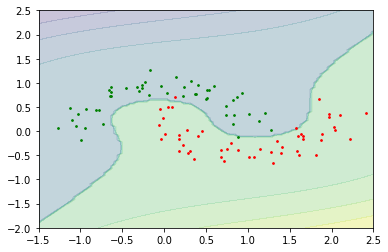

In [135]:
x0s = np.linspace(-1.5, 2.5, 100)
x1s = np.linspace(-2, 2.5, 100)
x0, x1 = np.meshgrid(x0s, x1s)
X_ = np.c_[x0.ravel(), x1.ravel()]
y_pred = polynomial_svm_clf.predict(X_).reshape(x0.shape)
y_decision = polynomial_svm_clf.decision_function(X_).reshape(x0.shape)

plt.contourf(x0, x1, y_pred, alpha = 0.1)
plt.contourf(x0, x1, y_decision, alpha = 0.2)
plt.scatter(X[y==0][:,0], X[y==0][:,1], c = 'g', s = 3)
plt.scatter(X[y==1][:,0], X[y==1][:,1], c = 'r', s = 3)
plt.show()

In [136]:
poly_kernel_svm_clf = Pipeline((
    ('scaling', StandardScaler()),
    ('svm_clf', SVC(kernel = 'poly', degree = 3, coef0 = 1, C = 5)),
    ))
poly_kernel_svm_clf.fit(X,y)
poly_kernel_svm_clf.score(X,y)

0.97999999999999998

### SVM Regression

In [142]:
from sklearn.svm import LinearSVR
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()
svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [144]:
svm_reg.score(X,y)

0.70512803194423657